### 0.0 - PACOTES

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Configurar opções de exibição
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### 0.1 - LEITURA E BREVE COMPREENSÃO DO DATASET

In [91]:
# Definindo tipos na mão, para consumir menos memória
df = pd.read_csv('Customers.csv', dtype={
    'CustomerID':'category',
    'Gender':'category',
    'Age':'category',
    'Annual Income ($)':np.dtype('int64'),
    'Profession':'category',
    'Work Experience': np.dtype('int32'),
    'Family Size': np.dtype('int32')
})

df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              2000 non-null   category
 1   Gender                  2000 non-null   category
 2   Age                     2000 non-null   category
 3   Annual Income ($)       2000 non-null   int64   
 4   Spending Score (1-100)  2000 non-null   int64   
 5   Profession              1965 non-null   category
 6   Work Experience         2000 non-null   int32   
 7   Family Size             2000 non-null   int32   
dtypes: category(4), int32(2), int64(2)
memory usage: 142.3 KB


In [93]:
df.shape

(2000, 8)

In [94]:
df.dtypes

CustomerID                category
Gender                    category
Age                       category
Annual Income ($)            int64
Spending Score (1-100)       int64
Profession                category
Work Experience              int32
Family Size                  int32
dtype: object

In [95]:
# Deixando o nome das colunas em lowercase
df.columns = [col.lower() for col in df.columns]

In [96]:
# Verificando percentual de valores nulos por coluna
df.isna().sum() / len(df) * 100

customerid                0.00
gender                    0.00
age                       0.00
annual income ($)         0.00
spending score (1-100)    0.00
profession                1.75
work experience           0.00
family size               0.00
dtype: float64

### 1.0 - ANÁLISE UNIVARIADA - CATEGÓRICAS

In [97]:
df['customerid'].nunique()

2000

#### 1.1 - GÊNERO

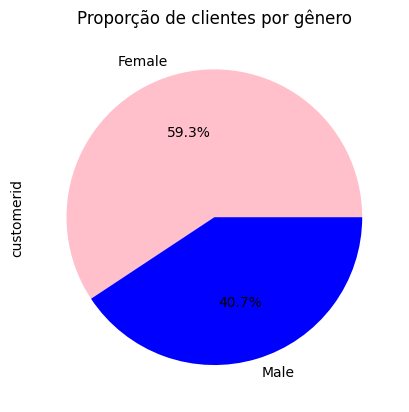

In [98]:
gender_series = df.groupby('gender', observed=False)['customerid'].nunique()

colors = ['pink', 'blue']
ax = gender_series.plot(kind="pie", colors=colors, autopct='%1.1f%%')
plt.title('Proporção de clientes por gênero')
plt.show()



#### 1.2 - IDADE

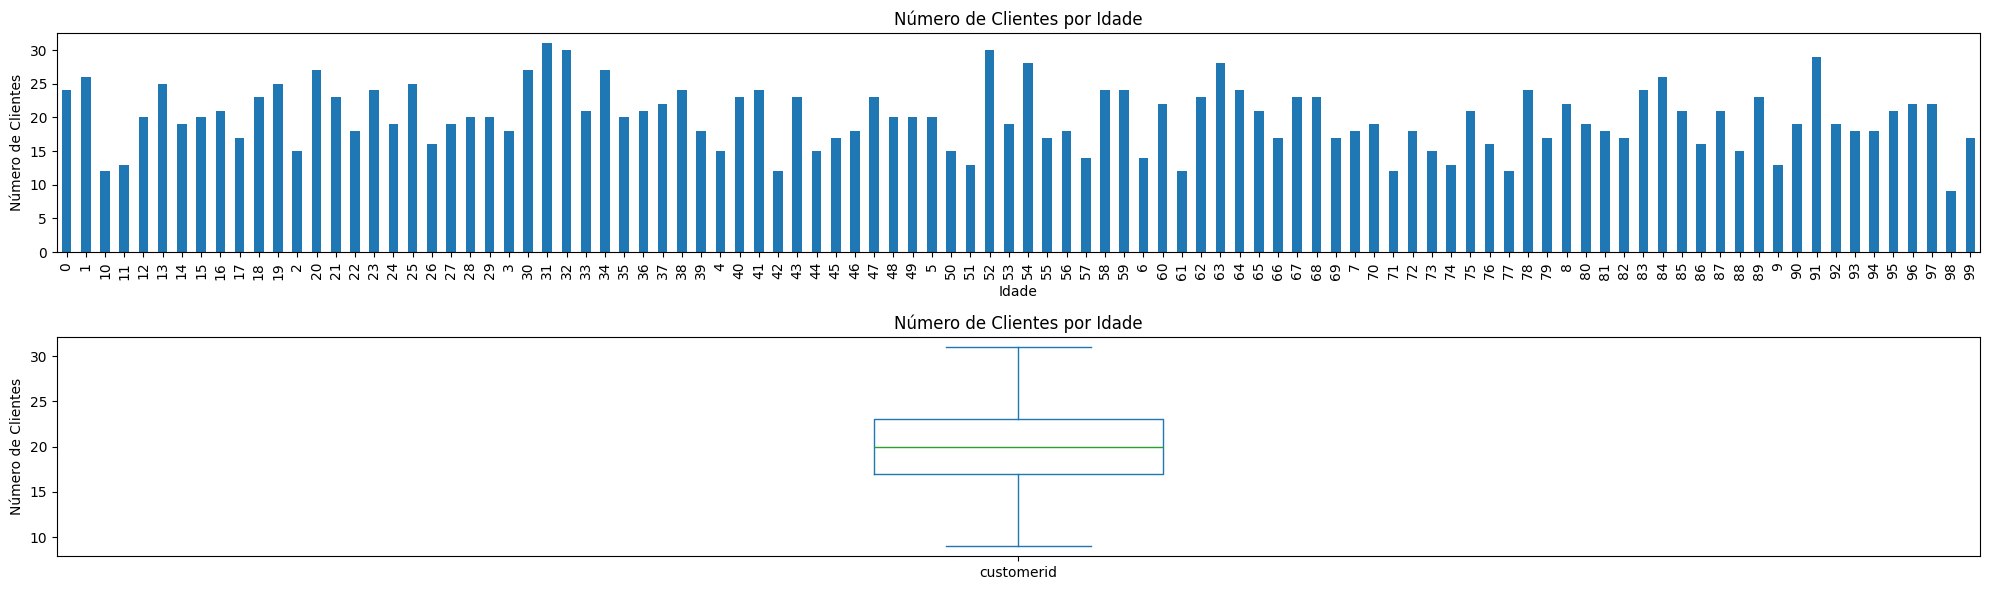

In [99]:
age_series = df.groupby('age', observed=False)['customerid'].nunique()

fig, axes = plt.subplots(2, 1, figsize=(20, 6))

age_series.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_title('Número de Clientes por Idade')


# Boxplot
age_series.plot(kind="box", ax=axes[1])
axes[1].set_ylabel('Número de Clientes')
axes[1].set_title('Número de Clientes por Idade')

plt.tight_layout()

plt.show()

In [100]:
(age_series / len(df) * 100).sort_values(ascending=False)

age
31    1.55
32    1.50
52    1.50
91    1.45
63    1.40
54    1.40
30    1.35
20    1.35
34    1.35
1     1.30
84    1.30
13    1.25
19    1.25
25    1.25
78    1.20
64    1.20
59    1.20
83    1.20
41    1.20
38    1.20
58    1.20
0     1.20
23    1.20
18    1.15
47    1.15
67    1.15
68    1.15
43    1.15
40    1.15
21    1.15
62    1.15
89    1.15
37    1.10
60    1.10
8     1.10
96    1.10
97    1.10
36    1.05
87    1.05
75    1.05
33    1.05
95    1.05
65    1.05
16    1.05
85    1.05
29    1.00
12    1.00
15    1.00
48    1.00
49    1.00
28    1.00
35    1.00
5     1.00
90    0.95
70    0.95
53    0.95
92    0.95
14    0.95
24    0.95
27    0.95
80    0.95
93    0.90
94    0.90
3     0.90
46    0.90
39    0.90
22    0.90
7     0.90
56    0.90
72    0.90
81    0.90
79    0.85
99    0.85
69    0.85
82    0.85
66    0.85
17    0.85
55    0.85
45    0.85
86    0.80
26    0.80
76    0.80
4     0.75
2     0.75
50    0.75
88    0.75
73    0.75
44    0.75
57    0.70
6     0.70
11    

As idades estão bem divididas entre 0 e 99 anos. Nenhuma idade chega a sequer 2% do dataset

#### 1.3 - PROFISSÕES

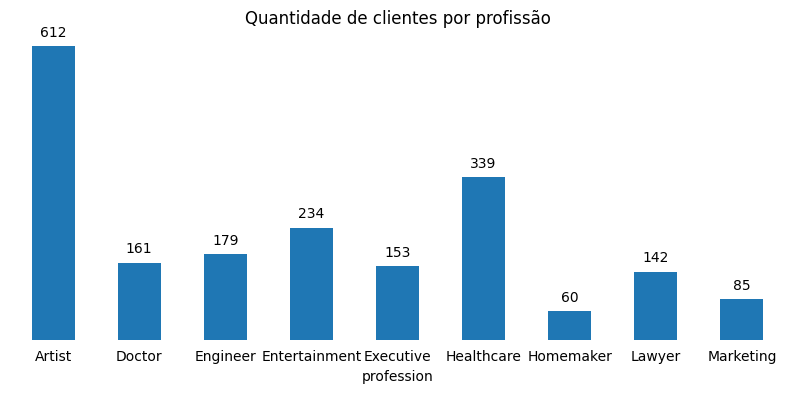

In [101]:
profession_series = df.groupby('profession', observed=False)['customerid'].nunique()

plt.figure(figsize=(10, 4))
plt.title('Quantidade de clientes por profissão')
ax = profession_series.plot(kind='bar')

# Adicionar rótulos de dados no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Remover poluições visuais
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rotacionar os rótulos do eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False);